## Do the genders commit different violations?
#### Examining traffic violations
Before comparing the violations being committed by each gender, you should examine the violations committed by all drivers to get a baseline understanding of the data.

In this exercise, you'll count the unique values in the violation column, and then separately express those counts as proportions.

In [1]:
import pandas as pd
ri = pd.read_csv("police.TXT")

# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep = ' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

ri.set_index("stop_datetime", inplace = True)
print(ri.columns)
print(ri.index)

Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')
DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-02-22 15:07:00', '2015-02-22 17:54:00',
               '2015-02-22 22:47:00', '2015-02-22 23:24:00',
               '2015-02-23 00:12:00', '2015-02-23 01:02:00',
               '2015-02-23 08:37:00', '2015-02-23 10:09:00',
               '2015-02-23 12:35:00', '2015-02-23 12:56:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=84495, freq=None)


In [2]:
ri.violation

stop_datetime
2005-01-04 12:55:00           Equipment
2005-01-23 23:15:00            Speeding
2005-02-17 04:15:00            Speeding
2005-02-20 17:15:00               Other
2005-02-24 01:20:00            Speeding
                             ...       
2015-02-23 01:02:00           Seat belt
2015-02-23 08:37:00           Seat belt
2015-02-23 10:09:00    Moving violation
2015-02-23 12:35:00    Moving violation
2015-02-23 12:56:00            Speeding
Name: violation, Length: 84495, dtype: object

In [3]:
# Count the unique values in 'violation'
print(ri.violation.value_counts(), "\n")

# Express the counts as proportions
print(ri.violation.value_counts(normalize = True))

violation
Speeding               45472
Moving violation       15022
Equipment               9727
Other                   4093
Registration/plates     3201
Seat belt               2060
Name: count, dtype: int64 

violation
Speeding               0.571436
Moving violation       0.188778
Equipment              0.122237
Other                  0.051436
Registration/plates    0.040226
Seat belt              0.025888
Name: proportion, dtype: float64


Interesting! More than half of all violations are for speeding, followed by other moving violations and equipment violations.

#### Comparing violations by gender
The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In this exercise, you'll first create a DataFrame for each gender, and then analyze the violations in each DataFrame separately. 

In [4]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize = True), "\n\n")

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize = True), "\n\n")

print(ri.groupby("driver_gender")["violation"].value_counts(normalize = True))

violation
Speeding               0.673795
Moving violation       0.136635
Equipment              0.100579
Registration/plates    0.041713
Other                  0.028146
Seat belt              0.019132
Name: proportion, dtype: float64 


violation
Speeding               0.532951
Moving violation       0.208390
Equipment              0.130367
Other                  0.060195
Registration/plates    0.039669
Seat belt              0.028429
Name: proportion, dtype: float64 


driver_gender  violation          
F              Speeding               0.673795
               Moving violation       0.136635
               Equipment              0.100579
               Registration/plates    0.041713
               Other                  0.028146
               Seat belt              0.019132
M              Speeding               0.532951
               Moving violation       0.208390
               Equipment              0.130367
               Other                  0.060195
               Regi

About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

## Does gender affect who gets a ticket for speeding?
#### Filtering by multiple conditions

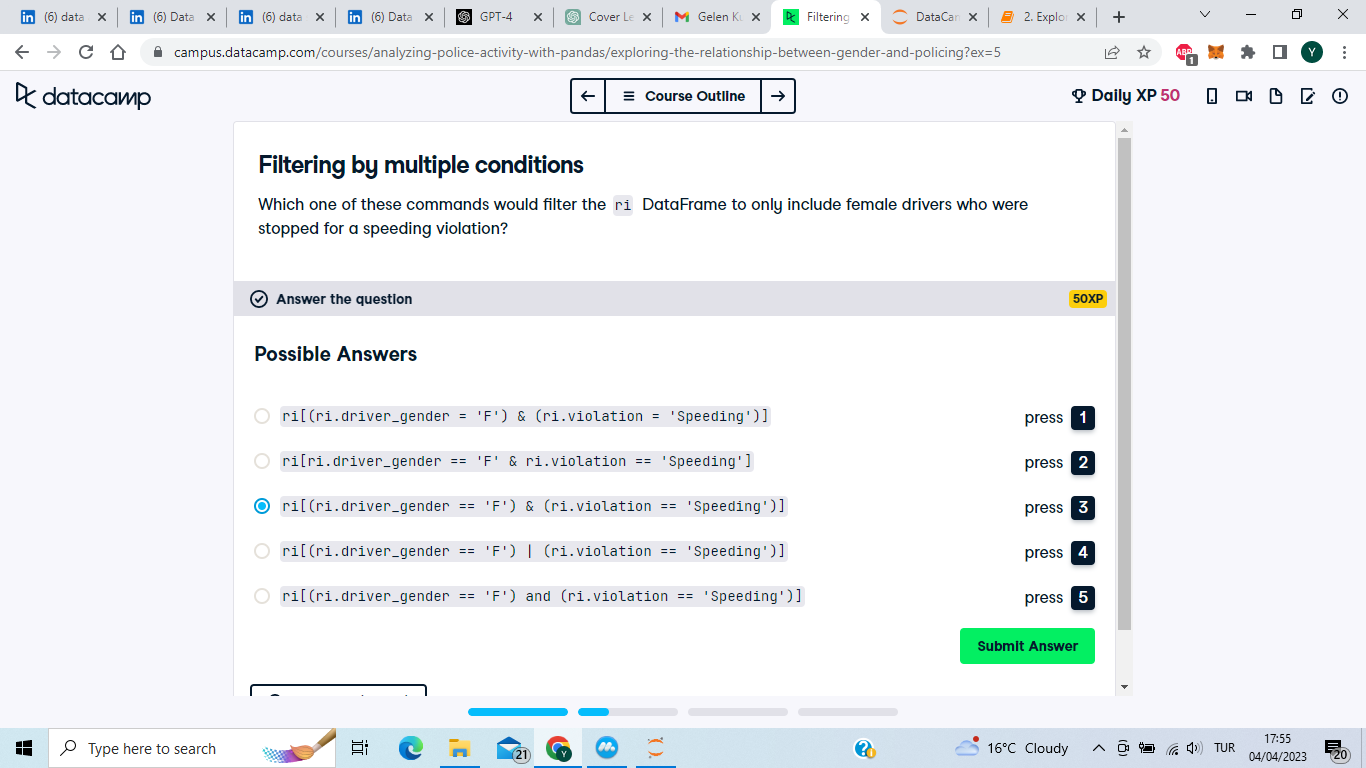

Correct! We'll use this code to filter the DataFrame in the next exercise.

#### Comparing speeding outcomes by gender
When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, you'll use the stop_outcome column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

In [5]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]


# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize = True),"\n")

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize = True))

stop_outcome
Citation            0.959934
Warning             0.032080
Arrest Driver       0.006006
N/D                 0.001024
Arrest Passenger    0.000614
No Action           0.000341
Name: proportion, dtype: float64 

stop_outcome
Citation            0.950746
Warning             0.029981
Arrest Driver       0.016093
Arrest Passenger    0.001168
No Action           0.001038
N/D                 0.000973
Name: proportion, dtype: float64


Interesting! The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

## Does gender affect whose vehicle is searched?
#### Calculating the search rate
During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops in the ri DataFrame that result in a vehicle search, also known as the search rate.

In [6]:
ri.search_conducted

stop_datetime
2005-01-04 12:55:00    False
2005-01-23 23:15:00    False
2005-02-17 04:15:00    False
2005-02-20 17:15:00    False
2005-02-24 01:20:00    False
                       ...  
2015-02-23 01:02:00    False
2015-02-23 08:37:00     True
2015-02-23 10:09:00    False
2015-02-23 12:35:00    False
2015-02-23 12:56:00    False
Name: search_conducted, Length: 84495, dtype: bool

In [7]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize = True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
search_conducted
False    0.963193
True     0.036807
Name: proportion, dtype: float64
0.03680691165157702


Great! It looks like the search rate is about 3.8%. Next, you'll examine whether the search rate varies by driver gender.

#### Comparing search rates by gender
In this exercise, you'll compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.

First, you'll filter the DataFrame by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a .groupby()

In [8]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender=='F'].search_conducted.mean(),"\n")

# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean(),"\n")

# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

0.019591611479028697 

0.046412699510626154 

driver_gender
F    0.019592
M    0.046413
Name: search_conducted, dtype: float64


Wow! Male drivers are searched more than twice as often as female drivers. Why might this be?

#### Adding a second factor to the analysis
Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Let's find out if that's the case!

In [13]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(["driver_gender","violation"]).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.044810
               Moving violation       0.039044
               Other                  0.044118
               Registration/plates    0.059537
               Seat belt              0.016827
               Speeding               0.008464
M              Equipment              0.076270
               Moving violation       0.061738
               Other                  0.046826
               Registration/plates    0.117698
               Seat belt              0.035280
               Speeding               0.028358
Name: search_conducted, dtype: float64


In [10]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(["violation","driver_gender"]).search_conducted.mean())

violation            driver_gender
Equipment            F                0.044810
                     M                0.076270
Moving violation     F                0.039044
                     M                0.061738
Other                F                0.044118
                     M                0.046826
Registration/plates  F                0.059537
                     M                0.117698
Seat belt            F                0.016827
                     M                0.035280
Speeding             F                0.008464
                     M                0.028358
Name: search_conducted, dtype: float64


Great work! For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

## Does gender affect who is frisked during a search?
#### Counting protective frisks
During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In this exercise, you'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

In [11]:
# Count the 'search_type' values
print(ri.search_type.value_counts(),"\n")

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype,"\n")

# Take the sum of 'frisk'
print(ri.frisk.sum())

search_type
Incident to Arrest                                          1242
Probable Cause                                               864
Reasonable Suspicion                                         201
Inventory                                                    196
Protective Frisk                                             151
Incident to Arrest,Inventory                                 115
Incident to Arrest,Probable Cause                             89
Probable Cause,Reasonable Suspicion                           47
Incident to Arrest,Inventory,Probable Cause                   33
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               32
Inventory,Probable Cause                                      20
Incident to Arrest,Inventory,Protective Frisk                 18
Protective Frisk,Reasonable Suspicion                         17
Incident to Arrest,Probable Cause,Protective Frisk            12
Inventory,Pro

Nice job! It looks like there were 284 drivers who were frisked. Next, you'll examine whether gender affects who is frisked.

#### Comparing frisk rates by gender
In this exercise, you'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

In [17]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby("driver_gender")["frisk"].mean())

print(ri.groupby("driver_gender")["frisk"].sum())

0.09131832797427653
driver_gender
F    0.075117
M    0.093890
Name: frisk, dtype: float64
driver_gender
F     32
M    252
Name: frisk, dtype: int64


Interesting! The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.